In [82]:
from src.nn.cnn.model.conv_network import ConvNetwork
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from scipy import misc
import math
from tqdm import tqdm
from src.gimp.draw.draw_triangle import draw_triangle as _draw_triangle
from src.gimp.draw.draw_line import draw_line as _draw_line
import os

class Encoder(object):
    def __init__(self):
        self.shape_predictor = ConvNetwork('../result/model/classifier/classifier-43')
        self.representation_predictors = [
            ConvNetwork('../result/model/ellipse/ellipse-14'),
            ConvNetwork('../result/model/rectangle/rectangle-75'),
            ConvNetwork('../result/model/line/line-13'),
            ConvNetwork('../result/model/triangle/triangle-11')
        ]
    
    def encode(self, img):
        action = np.argmax(self.shape_predictor.generate_args(img))
        args = self.representation_predictors[action].generate_args(img)
        return action, args
    
    
def load_data(name):
    path = "../data/dataset/random_shape_classification/"
    X = np.load(path + "%s_X_1.npy" % name, mmap_mode="r")
    Y = np.load(path + "%s_Y_1.npy" % name, mmap_mode="r")
    return X, Y

def show_source(i):
    plt.imshow(np.ones(X[i].shape) + X[i])

def draw(y_, shape):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    os.system('python ../src/gimp/draw/draw_selection_shape.py --name {} --shape {} --size {} --r {} --g {} --b {} --a {} --x {} --y {} --w {} --h {} --rotation {}'\
              .format(name, shape, 100, y_[0], y_[1], y_[2], y_[3], y_[4], y_[5], y_[6], y_[7], y_[8]))
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_rectangle(y):
    draw(y, 'rectangle')
    
def draw_ellipse(y):
    draw(y, 'ellipse')
    
def draw_triangle(y):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_triangle(name, 100, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_line(y):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_line(name, 100, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)

In [83]:
encoder = Encoder()

INFO:tensorflow:Restoring parameters from ../result/model/classifier/classifier-43
INFO:tensorflow:Restoring parameters from ../result/model/ellipse/ellipse-14
INFO:tensorflow:Restoring parameters from ../result/model/rectangle/rectangle-75
INFO:tensorflow:Restoring parameters from ../result/model/line/line-13
INFO:tensorflow:Restoring parameters from ../result/model/triangle/triangle-11


In [84]:
X, _ = load_data('train')

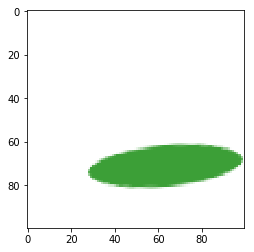

In [85]:
index = np.random.randint(0, X.shape[0])
show_source(index)

In [86]:
print(encoder.encode(X[index]))

(0, array([-1.4459214 ,  0.3049408 , -1.6433777 ,  1.9475746 , -0.34131545,
       -0.3742676 , -0.40877187, -0.07963745, -0.31908175], dtype=float32))
